In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline

import plotly
import plotly.express as px
import plotly.graph_objects as go

plt.rcParams['figure.figsize']=17,8
import cufflinks as cf       #conda install -c conda-forge python-cufflinks
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

import folium    #conda install -c conda-forge folium
from plotly.subplots import make_subplots

In [2]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
df=pd.read_csv(r"D:\datasets\covidglobal\5maycovid.csv")
df

,s.no,Name Of State/UT,Total confirmed cases,c\Cured/Discharged,Deaths
0,1,Andaman and Nicobar Islands,33,32,0
1,2,Andhra Pradesh,1717,589,36
2,3,Arunachal Pradesh,1,1,0
3,4,Assam,43,32,1
4,5,Bihar,536,142,4
5,6,Chandigarh,111,21,1
6,7,Chhattisgarh,59,36,0
7,8,Dadar Nagar Haveli,1,0,0
8,9,Delhi,5104,1468,64
9,10,Goa,7,7,0


In [4]:
df.drop(['s.no'], axis=1,inplace=True)


In [5]:
df

,Name Of State/UT,Total confirmed cases,c\Cured/Discharged,Deaths
0,Andaman and Nicobar Islands,33,32,0
1,Andhra Pradesh,1717,589,36
2,Arunachal Pradesh,1,1,0
3,Assam,43,32,1
4,Bihar,536,142,4
5,Chandigarh,111,21,1
6,Chhattisgarh,59,36,0
7,Dadar Nagar Haveli,1,0,0
8,Delhi,5104,1468,64
9,Goa,7,7,0


In [6]:
df.rename(columns={"Total confirmed cases":"confirmed_cases","c\Cured/Discharged":"Recovered"},inplace=True)
df

,Name Of State/UT,confirmed_cases,Recovered,Deaths
0,Andaman and Nicobar Islands,33,32,0
1,Andhra Pradesh,1717,589,36
2,Arunachal Pradesh,1,1,0
3,Assam,43,32,1
4,Bihar,536,142,4
5,Chandigarh,111,21,1
6,Chhattisgarh,59,36,0
7,Dadar Nagar Haveli,1,0,0
8,Delhi,5104,1468,64
9,Goa,7,7,0


In [7]:
df.dropna()

,Name Of State/UT,confirmed_cases,Recovered,Deaths
0,Andaman and Nicobar Islands,33,32,0
1,Andhra Pradesh,1717,589,36
2,Arunachal Pradesh,1,1,0
3,Assam,43,32,1
4,Bihar,536,142,4
5,Chandigarh,111,21,1
6,Chhattisgarh,59,36,0
7,Dadar Nagar Haveli,1,0,0
8,Delhi,5104,1468,64
9,Goa,7,7,0


In [8]:
total_cases_overall=df['confirmed_cases'].sum()
print('The total number of cases till now in India is ',total_cases_overall)

The total number of cases till now in India is  49391


In [9]:
df['total Active cases']=df['confirmed_cases']-(df['Recovered']+df['Deaths'])
df

,Name Of State/UT,confirmed_cases,Recovered,Deaths,total Active cases
0,Andaman and Nicobar Islands,33,32,0,1
1,Andhra Pradesh,1717,589,36,1092
2,Arunachal Pradesh,1,1,0,0
3,Assam,43,32,1,10
4,Bihar,536,142,4,390
5,Chandigarh,111,21,1,89
6,Chhattisgarh,59,36,0,23
7,Dadar Nagar Haveli,1,0,0,1
8,Delhi,5104,1468,64,3572
9,Goa,7,7,0,0


In [10]:
total_active_cases=df['total Active cases'].sum()
total_active_cases

33514

In [11]:
df.style.background_gradient(cmap='Reds')

,Name Of State/UT,confirmed_cases,Recovered,Deaths,total Active cases
0,Andaman and Nicobar Islands,33,32,0,1
1,Andhra Pradesh,1717,589,36,1092
2,Arunachal Pradesh,1,1,0,0
3,Assam,43,32,1,10
4,Bihar,536,142,4,390
5,Chandigarh,111,21,1,89
6,Chhattisgarh,59,36,0,23
7,Dadar Nagar Haveli,1,0,0,1
8,Delhi,5104,1468,64,3572
9,Goa,7,7,0,0


In [12]:
total_active_cases=df.groupby('Name Of State/UT')['total Active cases'].sum().sort_values(ascending=False).to_frame()
total_active_cases

,total Active cases
Name Of State/UT,
Maharashtra,12089
Gujarat,4496
Delhi,3572
Tamil Nadu,2540
Madhya Pradesh,1873
Uttar Pradesh,1837
Rajasthan,1544
Punjab,1293
Andhra Pradesh,1092


In [13]:
total_active_cases.style.background_gradient(cmap='Reds')

,total Active cases
Name Of State/UT,
Maharashtra,12089
Gujarat,4496
Delhi,3572
Tamil Nadu,2540
Madhya Pradesh,1873
Uttar Pradesh,1837
Rajasthan,1544
Punjab,1293
Andhra Pradesh,1092


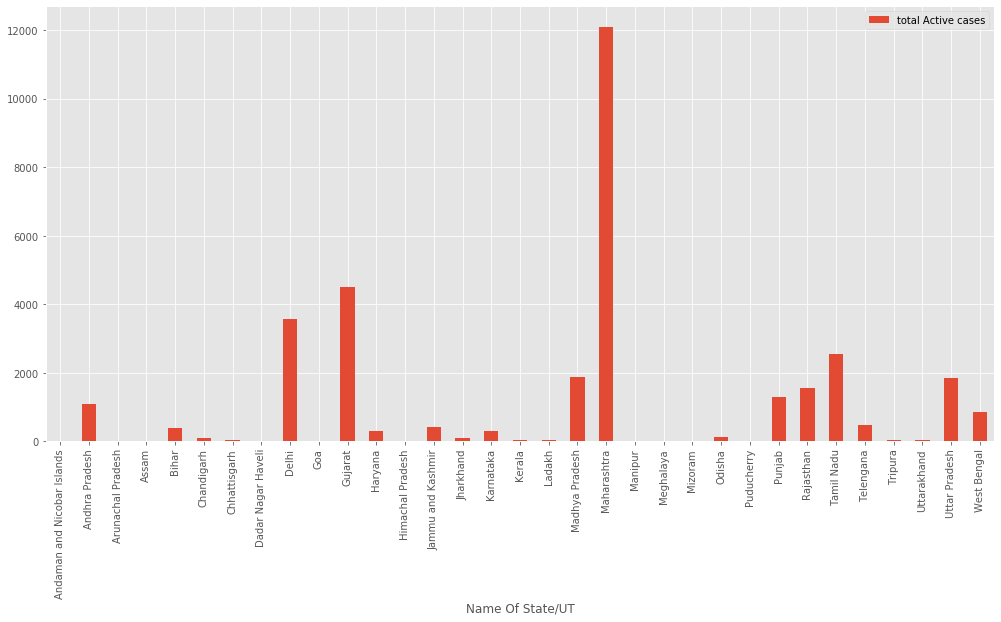

In [14]:
df.plot(kind='bar',x='Name Of State/UT',y='total Active cases')
plt.show()

In [15]:
#Plotly vis on data its more adv. to matplotlib or pandas vis
df.iplot(kind='bar',x='Name Of State/UT',y='total Active cases')
plt.show()

In [16]:
px.bar(df,x='Name Of State/UT',y='total Active cases')

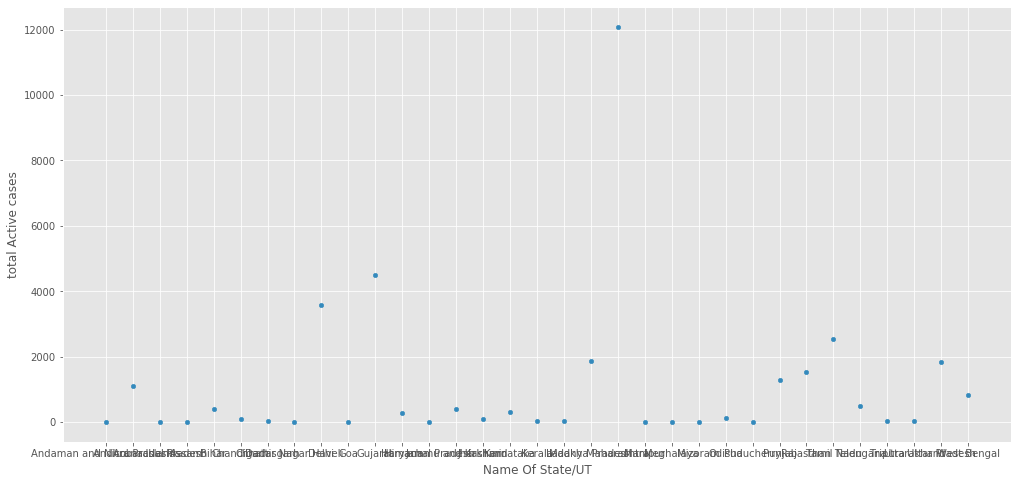

In [17]:
df.plot(kind='scatter',x='Name Of State/UT',y='total Active cases')
plt.show()

In [18]:
df.iplot(kind='scatter',x='Name Of State/UT',y='total Active cases',
         mode='markers+lines',title='My Graph',xTitle='Name of State / UT',yTitle='Total Cases',colors='red',size=15)


In [19]:
#plotly using Object orinted
fig=go.Figure()
fig.add_trace(go.Bar(x=df['Name Of State/UT'],y=df['total Active cases']))
fig.update_layout(title='Total Cases in India',xaxis=dict(title='Name of State / UT'),yaxis=dict(title='Total Active Cases'))

In [20]:
latlong=pd.read_csv(r"D:\datasets\covidglobal\latlong.csv")
latlong.head()

,Name Of State/UT,Lat,Long
0,Andaman and Nicobar Islands,11.667026,92.735983
1,Andhra Pradesh,14.750429,78.570026
2,Arunachal Pradesh,27.100399,93.616601
3,Assam,26.749981,94.216667
4,Bihar,25.785414,87.479973


In [21]:
df_full=pd.merge(latlong,df,on='Name Of State/UT')
df_full

,Name Of State/UT,Lat,Long,confirmed_cases,Recovered,Deaths,total Active cases
0,Andaman and Nicobar Islands,11.667026,92.735983,33,32,0,1
1,Andhra Pradesh,14.750429,78.570026,1717,589,36,1092
2,Arunachal Pradesh,27.100399,93.616601,1,1,0,0
3,Assam,26.749981,94.216667,43,32,1,10
4,Bihar,25.785414,87.479973,536,142,4,390
5,Chandigarh,30.719997,76.780006,111,21,1,89
6,Chhattisgarh,22.090420,82.159987,59,36,0,23
7,Dadar Nagar Haveli,20.266578,73.016618,1,0,0,1
8,Delhi,28.669993,77.230004,5104,1468,64,3572
9,Goa,15.491997,73.818001,7,7,0,0


In [45]:
map=folium.Map(location=[20,70],zoom_start=3,tiles='Stamenterrain')

for lat,long,value, name in zip(df_full['Lat'],df_full['Long'],df_full['total Active cases'],df_full['Name Of State/UT']):
    folium.CircleMarker([lat,long],radius=value*0.01,popup=('<strong>State</strong>: '+str(name).capitalize()+'<br>''<strong>total Active Cases</strong>: ' + str(value)+ '<br>'),color='red',fill_color='red',fill_opacity=0.2).add_to(map)

In [46]:
map